<a href="https://colab.research.google.com/github/aritrasen87/LLM_RAG_Model_Deployment/blob/main/LangMem_SemanticMemory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installations

In [ ]:
%pip install -U langmem langgraph --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.7 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_KEY')

In [ ]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o-mini")

### Agents without Memory

In [ ]:
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.store.memory import InMemoryStore

In [ ]:
checkpointer = InMemorySaver()
store = InMemoryStore()
agent = create_react_agent(model,
                           tools=[],
                           store=store,
                           checkpointer=checkpointer)


In [ ]:
def get_agent_response(agent, txt, thread_id):
    result_state = agent.invoke({"messages": [{"role": "user", "content": txt}]},
                                config={"configurable": {"thread_id": thread_id}})
    return result_state["messages"][-1].content

In [ ]:
response = get_agent_response(agent,
                   "Hi there, I'm planning for a 2 weeks trip for Goa , could you please give a detail day wise travel itenary including flight fare?",
                   "thread_1")

In [ ]:
print(response)

Sure! Here's a sample two-week itinerary for a trip to Goa, including suggestions for activities and estimated flight fares. Please note that actual flight fares can vary based on your location, the time of booking, and other factors. Therefore, I won’t provide specific costs but will give you a general idea. 

### Sample Itinerary for 2 Weeks in Goa

#### **Day 1: Arrival in Goa**
- **Flight:** Arrive at Goa International Airport (Dabolim Airport).
- **Transfer to Hotel:** Check into your hotel in North Goa (e.g., Calangute, Baga).
- **Relax:** Spend the evening relaxing on Baga Beach.
- **Dinner:** Enjoy dinner at a beachside shack.

#### **Day 2: Explore North Goa Beaches**
- **Morning:** Breakfast at the hotel.
- **Visit:** Anjuna Beach and Vagator Beach.
- **Activities:** Water sports (parasailing, jet skiing).
- **Lunch:** Beachfront café.
- **Evening:** Sunset at Chapora Fort.
- **Dinner:** Local Goan cuisine at a restaurant in Anjuna.

#### **Day 3: Cultural Exploration**
- **M

In [ ]:
response = get_agent_response(agent,
                   "Give me an approximate cost for the same",
                   "thread_1")

In [ ]:
print(response)

Sure! I can provide an estimated cost breakdown for a 2-week trip to Goa. Please note that these costs can vary widely based on the time of booking, personal preferences, and travel styles. The below estimates are for a mid-range travel experience.

### Estimated Cost Breakdown for 2 Weeks in Goa

#### 1. **Flights**
   - **Domestic Flights (Round Trip)**: 
     - From Mumbai/Bangalore: Approx. **$50 - $150**
     - From International Destinations: Approx. **$600 - $1200**
   - **Total Estimated Flight Cost**: **$600 - $1200** (for international travel)

#### 2. **Accommodation** (14 Nights)
   - **Budget Hotels or Guesthouses**: Approx. **$20 - $50 per night** (total **$280 - $700**)
   - **Mid-Range Hotels**: Approx. **$50 - $100 per night** (total **$700 - $1400**)
   - **Luxury Resorts**: Can go over **$150 per night** (total **$2100** or more)
   - **Total Estimated Accommodation Cost**: **$280 - $1400** (depending on your choice)

#### 3. **Food and Drinks**
   - Approx. **$10 - 

In [ ]:
## running with a different thread
response = get_agent_response(agent,
                   "Update the iternary with starting two days in Mumbai",
                   "thread_2")
print(response)

Sure! Here's an updated itinerary that starts with two days in Mumbai, followed by visits to other destinations:

### 10-Day Itinerary: Mumbai and Beyond

#### Day 1: Arrival in Mumbai
- **Morning:** Arrive at Chhatrapati Shivaji Maharaj International Airport. Check into your hotel.
- **Afternoon:** Visit the Gateway of India and take a boat ride to Elephanta Island to explore the ancient caves.
- **Evening:** Stroll through Colaba Causeway for shopping and enjoy dinner at a local restaurant.

#### Day 2: Explore Mumbai
- **Morning:** Visit the iconic Chhatrapati Shivaji Maharaj Terminus (CST) and the nearby Victoria Terminus.
- **Afternoon:** Explore the Prince of Wales Museum and visit the Kala Ghoda Art Precinct.
- **Evening:** Head to Marine Drive for a sunset view, then enjoy dinner at a seaside restaurant.

#### Day 3: Mumbai to Goa
- **Morning:** Fly from Mumbai to Goa. Check into your hotel.
- **Afternoon:** Relax on the beaches of North Goa (e.g., Anjuna or Baga).
- **Evening:

### Adding Memory into Agents with LangMem

It provides tooling to extract important information from conversations, optimize agent behavior through prompt refinement, and maintain long-term memory.

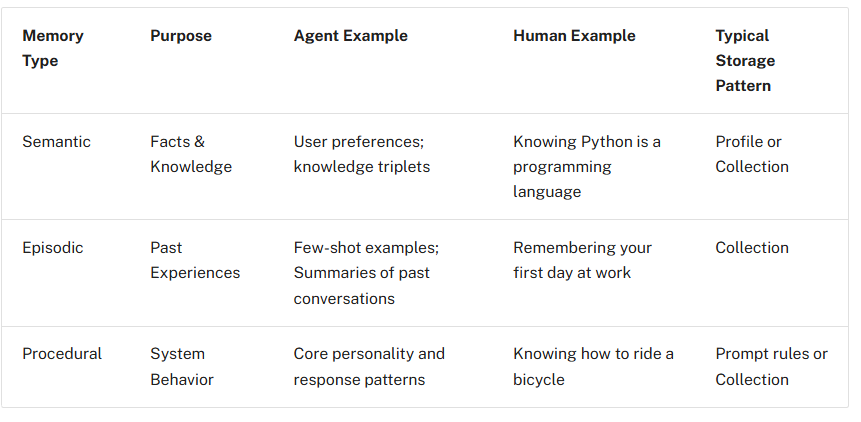

Two Tools:
- create_manage_memory_tool -- to add , delete , update the memory
- create_search_memory_tool -- To fetch relevant content from memory

In [ ]:
from langmem import create_manage_memory_tool, create_search_memory_tool

store = InMemoryStore(
    index={
        "dims": 1536,
        "embed": "openai:text-embedding-3-small"
    }
)

namespace = ("agent_memories",)
memory_tools = [
    create_manage_memory_tool(namespace),
    create_search_memory_tool(namespace)
]
checkpointer = InMemorySaver()
agent = create_react_agent(model,
                           tools=memory_tools,
                           store=store,
                           checkpointer=checkpointer)

/usr/local/lib/python3.11/dist-packages/langgraph/store/base/embed.py:95: LangChainBetaWarning: The function `init_embeddings` is in beta. It is actively being worked on, so the API may change.
  return init_embeddings(embed)


In [ ]:
response = get_agent_response(agent,
                   "Hi there, I'm planning for a 2 weeks trip for Goa , could you please give a detail day wise travel itinerary?",
                   "thread_1")

In [ ]:
print(response)

Here's a suggested 2-week itinerary for your trip to Goa:

### Day 1: Arrival in Goa
- Arrive at Goa's Dabolim Airport.
- Check in to your hotel in North Goa (Candolim, Calangute, or Baga).
- Spend the evening relaxing at the beach and enjoy local cuisine at a beach shack.

### Day 2: Explore North Goa Beaches
- Visit Candolim Beach in the morning.
- Head to Fort Aguada for panoramic views and some history.
- Lunch at a beach shack.
- Spend the afternoon at Calangute and Baga Beach.
- Enjoy water sports like parasailing or jet skiing.

### Day 3: North Goa Sightseeing
- Visit the Anjuna Flea Market for shopping.
- Explore Vagator Beach and Chapora Fort.
- Lunch at a local restaurant.
- Enjoy a sunset at Anjuna Beach.
- Experience the nightlife at a local club or beach party.

### Day 4: Water Sports and Adventure
- Spend the day at Water Sports at Calangute Beach.
- Enjoy activities like banana boat rides, scuba diving, or windsurfing.
- Overnight stay in North Goa.

### Day 5: Cultura

In [ ]:
response = get_agent_response(agent,
                   "Wish me Happy Journey! Please note down the details for me",
                   "thread_1")
print(response)

Wishing you a Happy Journey to Goa! 🌴✈️ May your trip be filled with beautiful memories, relaxation, and adventure! 

I've also noted down your detailed travel plans for reference. Enjoy your trip!


In [ ]:
## running with a different thread
response = get_agent_response(agent,
                   "Update the itinerary with starting two days in Mumbai and show me daywise itinerary",
                   "thread_2")
print(response)

Here's the updated day-wise itinerary that starts with two days in Mumbai before heading to Goa:

### Day 1: Arrival in Mumbai
- Check-in to the hotel
- Visit the Gateway of India
- Explore Colaba Causeway for shopping
- Dinner at a local restaurant

### Day 2: Mumbai Sightseeing
- Visit Chhatrapati Shivaji Terminus (CST)
- Explore the Elephanta Caves
- Visit Marine Drive and enjoy the sunset
- Try some local street food for dinner

### Day 3: Travel to North Goa
- Depart from Mumbai to Goa
- Check-in to your accommodation in North Goa
- Relax at the beach, such as Baga or Anjuna
- Enjoy beachside dinner

### Day 4: North Goa Beaches
- Explore more beaches (Vagator, Calangute)
- Water sports activities (parasailing, jet-skiing)
- Visit Fort Aguada in the evening
- Relax at a beach shack

### Day 5: Cultural Exploration in North Goa
- Visit the Basilica of Bom Jesus and Se Cathedral
- Explore the local markets
- Experience Goan cuisine for lunch
- Evening at a local music venue or beach

### User specific Memories -- Increasing Privacy of user specific contents

In [ ]:
from langmem import create_manage_memory_tool, create_search_memory_tool

store = InMemoryStore(
    index={
        "dims": 1536,
        "embed": "openai:text-embedding-3-small"
    }
)

namespace = ("agent_memories", "{user_id}")
memory_tools = [
    create_manage_memory_tool(namespace),
    create_search_memory_tool(namespace)
]
checkpointer = InMemorySaver()

agent = create_react_agent(model,
                           tools=memory_tools,
                           store=store,
                           checkpointer=checkpointer)

/usr/local/lib/python3.11/dist-packages/langgraph/store/base/embed.py:95: LangChainBetaWarning: The function `init_embeddings` is in beta. It is actively being worked on, so the API may change.
  return init_embeddings(embed)


In [ ]:
def get_agent_response(agent, txt, thread_id, user_id):
    result_state = agent.invoke({"messages": [{"role": "user", "content": txt}]},
                                config={"configurable": {"thread_id": thread_id, "user_id": user_id}})
    return result_state["messages"][-1].content

In [ ]:
response = get_agent_response(agent,
                   "Hi there, I'm planning for a 2 weeks trip for Goa , could you please give a detail day wise travel itenary including flight fare?",
                   "thread_1",
                    "user_1")

In [ ]:
print(response)

Sure! Here's a detailed day-wise travel itinerary for a 2-week trip to Goa. I'll include suggestions for activities, places to visit, and an estimated budget for flights. Please note that flight fares can vary based on your location, travel dates, and booking time, so I'll provide a rough estimate.

### Day 1: Arrival in Goa
- **Flight:** Arrive at Goa International Airport (Dabolim Airport).
- **Activities:** Check-in to your hotel, relax, and explore nearby beaches (e.g., Calangute or Baga Beach).
- **Overnight stay:** Goa
- **Estimated Flight Fare:** $100 - $300 (from major cities in India or nearby countries)

### Day 2: North Goa Exploration
- **Activities:** Visit Aguada Fort, Candolim Beach, and Sinquerim Beach. Enjoy water sports.
- **Overnight stay:** Goa

### Day 3: Beach Day
- **Activities:** Spend the day at Anjuna Beach, visit the Anjuna Flea Market (Wednesday), and enjoy the sunset.
- **Overnight stay:** Goa

### Day 4: Cultural Day
- **Activities:** Explore Old Goa - vis

In [ ]:
get_agent_response(agent,
                   "Wish me happy journey , and keep a note of the itinerary ",
                   "thread_1",
                    "user_1")

"Wishing you a **happy journey** to Goa! ✈️🌴 Enjoy your time exploring the beautiful beaches, local culture, and amazing activities.\n\nI've noted down your itinerary for your trip. If you need any assistance or information while you're there, feel free to reach out. Safe travels!"

In [ ]:
items = store.search(("agent_memories",))
for item in items:
    print(item.namespace, item.value)

('agent_memories', 'user_1') {'content': 'Day-wise travel itinerary for a 2-week trip to Goa. Day 1: Arrival, explore nearby beaches. Day 2: North Goa exploration (Aguada Fort, Candolim Beach). Day 3: Anjuna Beach and flea market. Day 4: Old Goa historical sites. Day 5: Dudhsagar Waterfalls trip. Day 6: Relaxation and spa day. Day 7: South Goa (Palolem, Agonda). Day 8: Grande Island trip. Day 9: Water sports at Colva Beach. Day 10: Spice plantation tour. Day 11: Local market explorations (Mapusa). Day 12: Adventure activities at Baga Beach. Day 13: Bhagwan Mahavir Wildlife Sanctuary. Day 14: Departure.'}
('agent_memories', 'user_1') {'content': 'User is planning a 2-week trip to Goa with a detailed itinerary including beaches, cultural sites, water activities, and relaxation days. The trip includes visits to North and South Goa, Dudhsagar Waterfalls, and local markets, as well as adventure activities. User wishes for a happy journey.'}


In [ ]:
get_agent_response(agent,
                   "Give me a plan to learn GenAI in 6 months, and please keep a note of this plan",
                   "thread_2",
                    "user_2")

'I have noted down the 6-month plan to learn Generative AI (GenAI). If you need any adjustments or additional information in the future, feel free to ask!'

In [ ]:
items = store.search(("agent_memories",))
for item in items:
    print(item.namespace, item.value)

('agent_memories', 'user_1') {'content': 'Day-wise travel itinerary for a 2-week trip to Goa. Day 1: Arrival, explore nearby beaches. Day 2: North Goa exploration (Aguada Fort, Candolim Beach). Day 3: Anjuna Beach and flea market. Day 4: Old Goa historical sites. Day 5: Dudhsagar Waterfalls trip. Day 6: Relaxation and spa day. Day 7: South Goa (Palolem, Agonda). Day 8: Grande Island trip. Day 9: Water sports at Colva Beach. Day 10: Spice plantation tour. Day 11: Local market explorations (Mapusa). Day 12: Adventure activities at Baga Beach. Day 13: Bhagwan Mahavir Wildlife Sanctuary. Day 14: Departure.'}
('agent_memories', 'user_1') {'content': 'User is planning a 2-week trip to Goa with a detailed itinerary including beaches, cultural sites, water activities, and relaxation days. The trip includes visits to North and South Goa, Dudhsagar Waterfalls, and local markets, as well as adventure activities. User wishes for a happy journey.'}
('agent_memories', 'user_2') {'content': 'Learn Ge